In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import tree 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as mp
import re

%matplotlib inline
sns.set()

In [8]:
test_df = pd.read_csv('titanic_test.csv')
train_df = pd.read_csv('titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


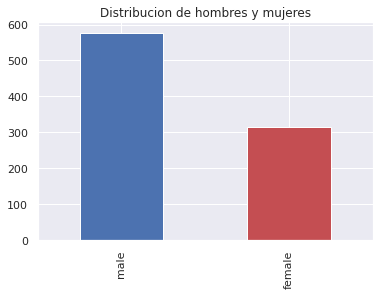

In [12]:
train_df.Sex.value_counts().plot(kind='bar',color=('b','r'))
plt.title('Distribucion de hombres y mujeres')
plt.show()

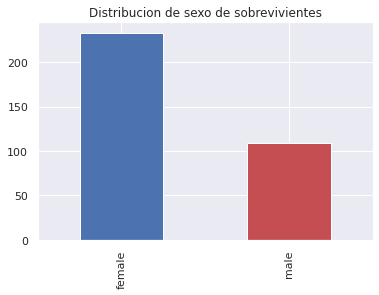

In [15]:
train_df[ train_df['Survived'] == 1 ]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sexo de sobrevivientes')
plt.show()

In [19]:
#Para transformar datos cualitativos a un código que entienda la máquina podemos usar un label encoder, se encuentra en el módulo preprocessing:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#Completaremos los valores nulos de Age (con la media de edades) y Embarked (con ‘S’; embarcados en Southampton)
train_df.Age = train_df.Age.fillna(train_df.Age.median())
train_df.Embarked = train_df.Embarked.fillna('S')

In [21]:
#Eliminamos la columnas que no consideramos necesarias
train_predictors = train_df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1) #axis=1 se refiere a las columnas (axis=0 → filas)

In [22]:
#Separamos las columnas categóricas de las numéricas:
#Para detectar la columnas categóricas analizamos la columna con dtype (debe ser igual a ‘object’), consideramos además que no haya mas de 10 diferentes valores (como factor de seguridad)
categorical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].nunique() <10
                    and train_predictors[cname].dtype=='object']

In [24]:
#Para detectar la columnas numéricas analizamos la columna con dtype (debe ser igual a 'int64' o 'float64')
numerical_cols = [cname for cname in train_predictors if
                  train_predictors[cname].dtype in ['int64','float64']]

In [25]:
#Unimos nuevamente las columnas en una sola variable pero con los datos numéricos separados de los categóricos
my_cols = categorical_cols+numerical_cols
train_predictors = train_predictors[my_cols]

In [28]:
#Usamos el método get_dummies para codificar las variables numéricas
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

Ahora tenemos nuestra data sin valores vacíos y codificada, lista para entrenar nuestro algoritmo

In [26]:
train_df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors

x_train , x_test, y_train , y_test =  train_test_split(x_features_one, y_target, test_size= .25, random_state=1)
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train,y_train)
tree_one_accuracy = round(tree_one.score(x_test,y_test), 4)
tree_one_accuracy

0.7534

In [33]:
from io import StringIO #nos permite trabaja con archivos externos
from IPython.display import Image, display #permite interactuar y crear imágenes
import pydotplus #permite usar el lenguaje graphviz para crear imágenes

out = StringIO()
tree.export_graphviz(tree_one, out_file=out) # exportamos los datos del árbol en lenguaje graphviz a StringIO

graph = pydotplus.graph_from_dot_data(out.getvalue()) #generamos el gráfico a través de pydotplus
graph.write_png('titanic.png') #guardamos el archivo en formato png

True